In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim

# Step 1: Download and Load the Dataset

- This step downloads the "Adult Income" dataset from the UCI Machine Learning Repository.
- The dataset is loaded into a Pandas DataFrame and given meaningful column names.
- Missing values are marked as NaN for easier handling in preprocessing.

In [9]:
def load_dataset():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
    column_names = [
        "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
        "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
        "hours-per-week", "native-country", "income"
    ]
    df = pd.read_csv(url, header=None, names=column_names, na_values=" ?", skipinitialspace=True)
    return df

# Load dataset
raw_data = load_dataset()
print("Dataset Head:")
print(raw_data.head()) 

Dataset Head:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             

# Step 2: Preprocess the Dataset

- **Dropping Missing Values:** Ensures the dataset is clean and ready for training.
- **Encoding Categorical Variables:** Converts non-numerical columns into numeric format using `LabelEncoder`, which is necessary for ML models to process categorical data.
- **Feature-Target Separation:** Splits the data into features (X) and the target variable (y).
- **Standardization:** Scales numerical features to have zero mean and unit variance, which helps the model converge faster during training.
- **Train-Test Split:** Divides the dataset into training and test sets for model evaluation.

In [10]:
def preprocess_dataset(df):
    # Drop rows with missing values
    df = df.dropna()

    # Encode categorical variables
    label_encoders = {}
    for column in df.select_dtypes(include=["object"]):
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

    # Separate features and target
    X = df.drop("income", axis=1)
    y = df["income"]

    # Standardize numeric features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y

X, y = preprocess_dataset(raw_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the MLP using PyTorch

- **Model Architecture:**
  - The MLP has an input layer, one hidden layer, and an output layer.
  - `ReLU` is used in the hidden layer to introduce non-linearity and help the model learn complex patterns.
  - `Sigmoid` is applied at the output layer to produce probabilities for binary classification.
- **`forward` Method:** Specifies how the input data flows through the layers during a forward pass.

In [11]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Step 4: Train the MLP

- **Model Initialization:**
  - `input_dim`, `hidden_dim`, and `output_dim` define the dimensions of the input features, hidden layer, and output.
- **Loss Function:** `BCELoss` is used for binary classification tasks.
- **Optimizer:** `SGD` adjusts weights to minimize the loss, with a learning rate of 0.1.
- **Training Loop:**
  - Performs forward and backward passes for 1000 epochs.
  - Tracks and minimizes the loss through gradient descent.
- **Visualization:** Plots the training loss over epochs to monitor convergence.



Training with hidden_dim = 2
Epoch 100/1000, Loss: 0.4537
Epoch 200/1000, Loss: 0.4232
Epoch 300/1000, Loss: 0.4099
Epoch 400/1000, Loss: 0.4012
Epoch 500/1000, Loss: 0.3939
Epoch 600/1000, Loss: 0.3848
Epoch 700/1000, Loss: 0.3720
Epoch 800/1000, Loss: 0.3619
Epoch 900/1000, Loss: 0.3555
Epoch 1000/1000, Loss: 0.3515

Training with hidden_dim = 4
Epoch 100/1000, Loss: 0.4651
Epoch 200/1000, Loss: 0.4229
Epoch 300/1000, Loss: 0.4028
Epoch 400/1000, Loss: 0.3875
Epoch 500/1000, Loss: 0.3717
Epoch 600/1000, Loss: 0.3598
Epoch 700/1000, Loss: 0.3525
Epoch 800/1000, Loss: 0.3479
Epoch 900/1000, Loss: 0.3449
Epoch 1000/1000, Loss: 0.3429

Training with hidden_dim = 8
Epoch 100/1000, Loss: 0.4332
Epoch 200/1000, Loss: 0.3883
Epoch 300/1000, Loss: 0.3728
Epoch 400/1000, Loss: 0.3627
Epoch 500/1000, Loss: 0.3551
Epoch 600/1000, Loss: 0.3493
Epoch 700/1000, Loss: 0.3451
Epoch 800/1000, Loss: 0.3419
Epoch 900/1000, Loss: 0.3395
Epoch 1000/1000, Loss: 0.3376

Training with hidden_dim = 16
Epoch 

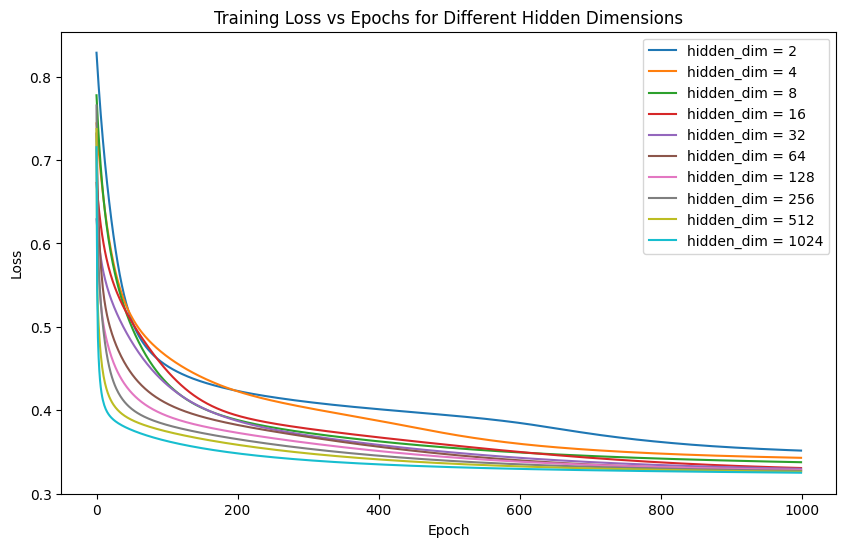

In [12]:
# List of hidden dimensions to experiment with
hidden_dims = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

input_dim = X_train.shape[1]
output_dim = 1
epochs = 1000

# Dictionary to store loss history for each hidden_dim
train_losses = {}

# Convert data to PyTorch tensors (once for all experiments)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

for hidden_dim in hidden_dims:
    # Create a new instance of the model for each hidden_dim
    mlp = MLP(input_dim, hidden_dim, output_dim)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(mlp.parameters(), lr=0.1)
    
    losses = []
    print(f"\nTraining with hidden_dim = {hidden_dim}")
    for epoch in range(epochs):
        # Forward pass: compute outputs and loss
        outputs = mlp(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        losses.append(loss.item())
        
        # Backward pass: compute gradients and update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print progress every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")
    
    train_losses[hidden_dim] = losses

# Plot the training loss curves for each hidden dimension
plt.figure(figsize=(10, 6))
for hidden_dim in hidden_dims:
    plt.plot(train_losses[hidden_dim], label=f'hidden_dim = {hidden_dim}')
plt.title("Training Loss vs Epochs for Different Hidden Dimensions")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [14]:
# List of hidden layer counts to experiment with
hidden_layers_list = [1, 2, 3, 4, 5]
hidden_dim = 128 

input_dim = X_train.shape[1]
output_dim = 1
epochs = 1000

train_losses = {}

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

for num_hidden_layers in hidden_layers_list:
    mlp = MLP(input_dim, hidden_dim, output_dim, num_hidden_layers=num_hidden_layers)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(mlp.parameters(), lr=0.1)
    
    losses = []
    print(f"\nTraining with {num_hidden_layers} hidden layer(s)")
    for epoch in range(epochs):
        # Forward pass: compute outputs and loss
        outputs = mlp(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        losses.append(loss.item())
        
        # Backward pass: compute gradients and update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print progress every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")
    
    train_losses[num_hidden_layers] = losses


plt.figure(figsize=(10, 6))
for num_hidden_layers in hidden_layers_list:
    plt.plot(train_losses[num_hidden_layers], label=f'{num_hidden_layers} hidden layer(s)')
plt.title("Training Loss vs Epochs for Different Numbers of Hidden Layers (256 neurons per layer)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

TypeError: MLP.__init__() got an unexpected keyword argument 'num_hidden_layers'

# Step 5: Evaluate the MLP
- **Evaluation Function:**
  - Sets the model to evaluation mode using `model.eval()`.
  - Makes predictions by thresholding the output probabilities at 0.5 for binary classification.
  - Calculates accuracy by comparing predictions to actual labels.
- **Results:** Displays accuracy for both training and test datasets to assess model performance.

In [13]:
def evaluate_model(model, X, y):
    model.eval()
    with torch.no_grad():
        predictions = model(X) > 0.5
        accuracy = torch.mean((predictions == y).float()).item()
    return accuracy

train_accuracy = evaluate_model(mlp, X_train_tensor, y_train_tensor)
test_accuracy = evaluate_model(mlp, X_test_tensor, y_test_tensor)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

NameError: name 'X_test_tensor' is not defined